In [2]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/bassetbat/MCM-problem-C-data/master/pacifier.tsv'
micro = pd.read_table(url, sep = '\t')

reviews = {}
i = -1
for j in micro['review_body']:
    i= i+1
    reviews[i] = j
    if i > 2000:
        break
len(reviews)

2002

In [3]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    list_of_text = str(list_of_text)
    combined_text = ''.join(list_of_text)
    return combined_text

In [4]:
data_combined = {key: [combine_text(value)] for (key, value) in reviews.items()}
print (data_combined)

{0: ['Perfect match for the Gund Huggybuddy I bought as a baby gift.'], 1: ['My little girl love this paci contraption!'], 2: ['My son loves this one and will only sleep if he has this one.'], 3: ['Perfect'], 4: ['Amazing addition to the nursery!'], 5: ['Great, breathable, and basic pacifier.'], 6: ['Great pacifiers'], 7: ["The bear does exactly what we ordered it to do. The heartbeat/womb sounds helped our first daughter to sleep and she still sleeps with her heartbeat bear (she's almost 3) and this is baby number 2's. I do wish the volume could be turned down more. The bear is also a darker chocolate brown than I anticipated based off the items picture which was disappointing for me.  Edit - Once the womb noise times out, restarting it is a hassle. Just turning the switch to off and then back on does not work. It requires turning the switch to off multiple times to get it restart the womb noise. Sometimes it takes two times. Sometimes it takes seven. It's not reliable and I wish I wo

In [5]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['reviews']
data_df = data_df.sort_index()
data_df

,reviews
0,Perfect match for the Gund Huggybuddy I bought as a baby gift.
1,My little girl love this paci contraption!
2,My son loves this one and will only sleep if he has this one.
3,Perfect
4,Amazing addition to the nursery!
...,...
1997,"Adorable. This was a gift. My son had the dino version, unfortunately he never took a paci."
1998,Nice one for my one year old. I would certainly recommend this product.
1999,Haven't had water get inside of them like most and they don't fall out of my sons mouth. No cons as of yet
2000,"Got one of these as a freebie when I was pregnant. Unfortunately, it was clear and got lost easily. These stand out awesomely no matter where it f..."


In [6]:
data_df.reviews.loc[3]

'Perfect'

In [7]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('baby', '', text)
    text = re.sub('br', '', text)
    text = re.sub('just', '', text)
    text = re.sub('like', '', text)
    text = re.sub('good', '', text)
    text = re.sub('use', '', text)
    text = re.sub('used', '', text)
    text = re.sub('ge', '', text)
    text = re.sub('samsung', '', text)
    text = re.sub('unit', '', text)
    text = re.sub('product', '', text)
    text = re.sub('does', '', text)
    text = re.sub('pacifier', '', text)
    text = re.sub('pacifiers', '', text)
    text = re.sub('got', '', text)
    text = re.sub('love', '', text)
    text = re.sub('loves', '', text)
    text = re.sub('great', '', text)
    text = re.sub('ok', '', text)
    text = re.sub('beca', '', text)
    text = re.sub('easy', '', text)
    text = re.sub('easily', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [8]:
data_clean = pd.DataFrame(data_df.reviews.apply(round1))
data_clean

,reviews
0,perfect match for the gund huggybuddy i bought as a gift
1,my little girl this paci contraption
2,my son s this one and will only sleep if he has this one
3,perfect
4,amazing addition to the nursery
...,...
1997,adorable this was a gift my son had the dino version unfortunately he never to a paci
1998,nice one for my one year old i would certainly recommend this
1999,havent had water t inside of them most and they dont fall out of my sons mouth no cons as of yet
2000,one of these as a freebie when i was pregnant unfortunately it was clear and lost these stand out awesomely no matter where it falls and my son...


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.reviews)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,ability,able,abnormal,absolute,absolutely,accent,accept,acceptable,accepted,access,...,zappos,zea,zen,zip,ziploc,zipped,zipper,zippered,zippers,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['reviews'].apply(pol)
data_clean['subjectivity'] = data_clean['reviews'].apply(sub)
data_clean

,reviews,polarity,subjectivity
0,perfect match for the gund huggybuddy i bought as a gift,1.000000,1.000000
1,my little girl this paci contraption,-0.187500,0.500000
2,my son s this one and will only sleep if he has this one,0.000000,1.000000
3,perfect,1.000000,1.000000
4,amazing addition to the nursery,0.600000,0.900000
...,...,...,...
1997,adorable this was a gift my son had the dino version unfortunately he never to a paci,0.375000,1.000000
1998,nice one for my one year old i would certainly recommend this,0.304762,0.590476
1999,havent had water t inside of them most and they dont fall out of my sons mouth no cons as of yet,0.500000,0.500000
2000,one of these as a freebie when i was pregnant unfortunately it was clear and lost these stand out awesomely no matter where it falls and my son...,-0.141667,0.720833


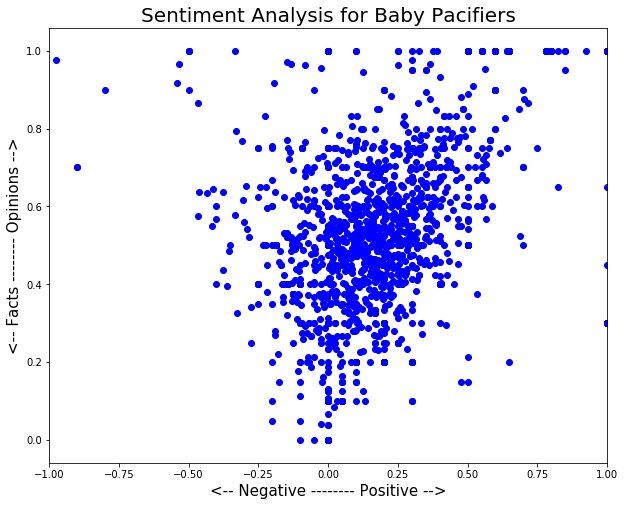

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]
i = -1
for j in data_clean.reviews:
    i = i + 1
    x = data_clean.polarity.loc[i]
    y = data_clean.subjectivity.loc[i]
    plt.scatter(x, y, color='blue')
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis for Baby Pacifiers', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [12]:
print(data_clean.polarity.loc[3])

1.0


In [13]:
polarity_transcript = []
i = -1
c = 0
n = 1
for j in data_clean.reviews:
    i= i + 1
    c = c + TextBlob(j).sentiment.polarity
    if i < 1614:
        if micro['review_date'][i] == micro['review_date'][i+1]:
            n = n + 1
        else: 
            polarity_transcript.append(c/n)
            c = 0
            n = 1
    else: 
        polarity_transcript.append(c/n)
        c = 0
        n = 1
polarity_transcript

[0.41153292181069967,
 0.18738097785923458,
 0.30386243386243383,
 0.1665980451460249,
 0.1291017757952876,
 0.15887445887445886,
 0.08261955393534341,
 0.19206101190476188,
 0.08768939393939394,
 0.1326388888888889,
 0.19433513708513708,
 0.17809539710193018,
 0.28477244433126786,
 0.19733186357941254,
 0.15988768042854581,
 0.1692416225749559,
 0.16214598649118742,
 0.20957382696668414,
 0.01448770108492329,
 0.10841750841750841,
 0.19023809523809523,
 0.5071428571428571,
 0.1183888888888889,
 0.07444444444444445,
 0.18803539218717788,
 0.17181651474866635,
 0.2434306094232565,
 0.16365630505668097,
 0.21244168962350782,
 0.20318827160493827,
 0.11160893990604137,
 0.23285335851512318,
 0.03910403050108933,
 0.1321050246050246,
 0.1537330898268398,
 0.142441801168653,
 0.053055555555555564,
 0.17221153846153847,
 0.15502473716759432,
 0.09006608347220463,
 0.20122685185185182,
 0.15377058054792433,
 0.2501931401931402,
 0.103037037037037,
 0.12251432880844648,
 0.1503939393939394,
 0

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

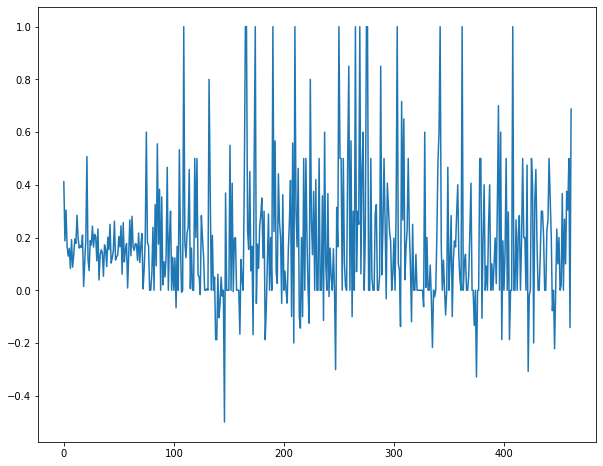

In [15]:
plt.plot(polarity_transcript)
plt.title(data_clean['reviews'].index['Sentiment Analysis for Baby Pacifiers over time'])
plt.show()

In [133]:
from gensim import matutils, models
import scipy.sparse
data = data_dtm
tdm = data.transpose()
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [134]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [135]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=1, passes=20)
lda.print_topics()

[(0,
  '0.083*"best" + 0.083*"quality" + 0.079*"having" + 0.078*"disappointed" + 0.078*"years" + 0.078*"order" + 0.078*"ago" + 0.077*"knew" + 0.077*"remembered" + 0.077*"pod"'),
 (1,
  '0.009*"little" + 0.007*"cute" + 0.007*"mouth" + 0.006*"daughter" + 0.006*"really" + 0.005*"son" + 0.005*"old" + 0.005*"time" + 0.005*"dont" + 0.005*"perfect"'),
 (2,
  '0.082*"son" + 0.079*"lost" + 0.079*"clear" + 0.079*"falls" + 0.078*"unfortunately" + 0.078*"matter" + 0.078*"stand" + 0.078*"pregnant" + 0.078*"freebie" + 0.078*"awesomely"')]